In [2]:
import pandas as pd
from sklearn import *
from yellowbrick.cluster import KElbowVisualizer

Load data from digitData2.csv" file. The last column of each file presents the label and rest of the columns are features. 

In [5]:
data = pd.read_csv('digitData2.csv', header=None)
x = data[64]
data = data.drop(64)
dataFrame = pd.DataFrame(data, index = x.values)
#dataFrame = pd.DataFrame(data)

print(dataFrame)

      0    1     2     3     4     5     6    7    8    9   ...   55   56  \
0.0  0.0  0.0   5.0  13.0   9.0   1.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
1.0  0.0  0.0   0.0  12.0  13.0   5.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
2.0  0.0  0.0   0.0   4.0  15.0  12.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
3.0  0.0  0.0   7.0  15.0  13.0   1.0   0.0  0.0  0.0  8.0  ...  0.0  0.0   
4.0  0.0  0.0   0.0   1.0  11.0   0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
..   ...  ...   ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...   
7.0  0.0  0.0   7.0   8.0  13.0  16.0  15.0  1.0  0.0  0.0  ...  0.0  0.0   
5.0  0.0  0.0  12.0  10.0   0.0   0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
4.0  0.0  0.0   0.0   1.0  11.0   0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
4.0  0.0  0.0   0.0   1.0  11.0   0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
7.0  0.0  0.0   7.0   8.0  13.0  16.0  15.0  1.0  0.0  0.0  ...  0.0  0.0   

      57    58    59    60    61   62   63   64  
0.0  0.0   6.0  13.0  10.

Selecting the optimum k value using Silhouette Coefficient and plot the optimum k values. 

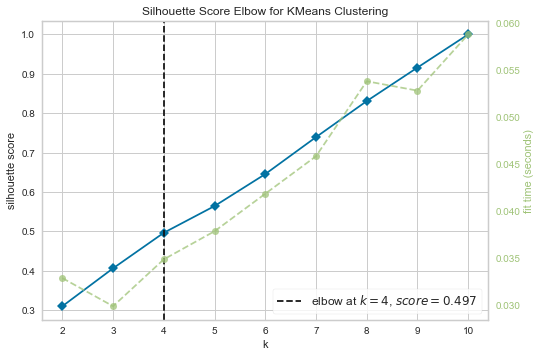

In [23]:
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette')

visualizer.fit(dataFrame.values)
visualizer.show()

Create clusters using Kmeans and Kmeans++ algorithms with optimal k value found in the previous problem. Report performances using appropriate evaluation metrics. Compare the results. 

In [30]:
X=dataFrame.iloc[:,0:-1]
y_true=dataFrame.iloc[:,-1]
model = cluster.KMeans(n_clusters=4, init='random')
y_pred=model.fit_predict(X)
print('random')
print(metrics.classification_report(y_true, y_pred))

model = cluster.KMeans(n_clusters=4, init='k-means++')
y_pred=model.fit_predict(X)
print('kmeans++')
print(metrics.classification_report(y_true, y_pred))

random
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     152.0
         1.0       0.00      0.00      0.00     156.0
         2.0       0.00      0.00      0.00     150.0
         3.0       0.00      0.00      0.00     157.0
         4.0       0.00      0.00      0.00     153.0
         5.0       0.00      0.00      0.00     154.0
         6.0       0.00      0.00      0.00     155.0
         7.0       0.00      0.00      0.00     153.0
         8.0       0.00      0.00      0.00     147.0
         9.0       0.00      0.00      0.00     151.0

    accuracy                           0.00    1528.0
   macro avg       0.00      0.00      0.00    1528.0
weighted avg       0.00      0.00      0.00    1528.0

kmeans++
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       152
         1.0       0.51      1.00      0.68       156
         2.0       0.00      0.00      0.00       150
        

C:\Users\Tom.S\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tom.S\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now repeat clustering using Kmeans for 50 times and report the average performance. Again compare the results that you have obtained in Q3 using Kmeans++ and explain the difference (if any).

In [39]:
avg = 0

for i in range(50):
    X=dataFrame.iloc[:,0:-1]
    y_true=dataFrame.iloc[:,-1]
    model = cluster.KMeans(n_clusters=4, init='random')
    y_pred=model.fit_predict(X)
    avg = (avg + metrics.accuracy_score(y_true, y_pred))/2
print('average accuracy is ' + str(avg))

average accuracy is 0.08087144446901745
